In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle # For rectangles
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
from scipy import stats # For linregress (trends)
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
# sys.path.insert(1, '../../../') # to include my util file in previous directory
sys.path.insert(1, '/home/mlalande/notebooks/utils') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
u.check_virtual_memory()

3.8.2 | packaged by conda-forge | (default, Feb 28 2020, 17:15:22) 
[GCC 7.3.0]
Virtual memory usage - total: 252 GB / available: 216 GB / percent used: 14.2 %


# Check model data

In [2]:
path = '/thredds/tgcc/store/p86caub/ICOLMDZOR/PROD/highresSST-present/CM7A-HR-v1.11.highresSST-present'
path_CM6 = '/bdd/CMIP6/HighResMIP/IPSL/IPSL-CM6A-ATM-HR/highresSST-present/r1i1p1f1'

folder = 'SRF'
var_LMDZ = 'frac_snow'

var = 'snc'
table = 'LImon'

latlim, lonlim = u.get_domain_HMA()
latlim_ext, lonlim_ext = slice(latlim.start-5, latlim.stop+5), slice(lonlim.start-5, lonlim.stop+5)

In [3]:
xr.open_dataset(path+'/'+folder+'/Analyse/TS_MO/CM7A-HR-v1.11.highresSST-present_19500101_20141231_1M_'+var_LMDZ+'.nc')

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, lat: 360, lon: 720, time_counter: 780)
Coordinates:
  * lat                   (lat) float32 -90.0 -89.498604 ... 89.498604 90.0
  * lon                   (lon) float32 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5
    time_centered         (time_counter) datetime64[ns] ...
  * time_counter          (time_counter) datetime64[ns] 1950-01-16T12:00:00 ... 2014-12-16T12:00:00
Dimensions without coordinates: axis_nbounds
Data variables:
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    Areas                 (lat, lon) float32 ...
    Contfrac              (lat, lon) float32 ...
    frac_snow             (time_counter, lat, lon) float32 ...
Attributes:
    name:         sechiba_history
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2020-Jan-24 08:26:06 GMT
    uuid:         df84bd4e-118e-421f-9b7f-244e0c536f0f
    LongName:     IPSLCM6.1.11-LR

In [4]:
xr.open_dataset(path_CM6+'/'+table+'/'+var+'/gr/latest/'+var+'_'+table+'_IPSL-CM6A-ATM-HR_highresSST-present_r1i1p1f1_gr_195001-201412.nc')

<xarray.Dataset>
Dimensions:      (axis_nbounds: 2, lat: 361, lon: 512, time: 780)
Coordinates:
  * lat          (lat) float32 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon          (lon) float32 0.0 0.703125 1.40625 ... 358.59375 359.29688
  * time         (time) datetime64[ns] 1950-01-16T12:00:00 ... 2014-12-16T12:00:00
Dimensions without coordinates: axis_nbounds
Data variables:
    time_bounds  (time, axis_nbounds) datetime64[ns] ...
    snc          (time, lat, lon) float32 ...
Attributes:
    name:                  /ccc/work/cont003/gencmip6/p86ghatt/IGCM_OUT/LMDZO...
    Conventions:           CF-1.7 CMIP-6.2
    creation_date:         2018-09-20T11:33:54Z
    tracking_id:           hdl:21.14100/8a82058d-42b7-4a38-9b29-4a4136fbd16c
    description:           Forced global atmosphere-land simulations using da...
    title:                 IPSL-CM6A-ATM-HR model output prepared for CMIP6 /...
    activity_id:           HighResMIP
    contact:               ipsl-cmip6@listes.ipsl.fr
    data_specs_version:    01.00.21
    dr2xml_version:        1.12
    experiment_id:         highresSST-present
    experiment:            forced atmosphere experiment for 1950-2014
    external_variables:    areacella
    forcing_index:         1
    frequency:             mon
    further_info_url:      https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL-CM6...
    grid:                  LMDZ grid
    grid_label:            gr
    nominal_resolution:    50 km
    initialization_index:  1
    institution_id:        IPSL
    institution:           Institut Pierre Simon Laplace, Paris 75252, France
    license:               CMIP6 model data produced by IPSL is licensed unde...
    mip_era:               CMIP6
    physics_index:         1
    product:               model-output
    realization_index:     1
    realm:                 landIce land
    source:                IPSL-CM6A-ATM-HR (2018):  atmos: LMDZ (NPv6, N256;...
    source_id:             IPSL-CM6A-ATM-HR
    source_type:           AGCM
    sub_experiment_id:     none
    sub_experiment:        none
    table_id:              LImon
    variable_id:           snc
    variant_label:         r1i1p1f1
    EXPID:                 highresSST-present
    CMIP6_CV_version:      cv=6.2.3.5-2-g63b123e
    dr2xml_md5sum:         523ab9c7b70cfe3bc2c825d1e555e1d0
    model_version:         6.1.5
    branch_method:         no parent
    parent_activity_id:    no parent
    parent_experiment_id:  no parent
    parent_mip_era:        no parent
    parent_source_id:      no parent
    parent_time_units:     no parent
    history:               Wed Oct 24 15:13:26 2018: ncatted -O -a parent_var...
    NCO:                   "4.6.0"
    parent_variant_label:  no parent

# Define period and zone

In [5]:
# Define common period -> smaller period because MODIS only from March 2000
period = slice('2001','2014')

var = 'snc'
label = 'Snow cover extent'
units = '%'
cmap='viridis'
levels=plot.arange(0,100,10)

# Get model data dynamico and HR CM6

In [6]:
model_CM7 = xr.open_dataset(
    path+'/'+folder+'/Analyse/TS_MO/CM7A-HR-v1.11.highresSST-present_19500101_20141231_1M_'+var_LMDZ+'.nc'
)[var_LMDZ].sel(lat=latlim_ext, lon=lonlim_ext, time_counter=period)
model_CM7 = model_CM7.rename({'time_counter': 'time'})
model_CM7

<xarray.DataArray 'frac_snow' (time: 168, lat: 70, lon: 121)>
[1422960 values with dtype=float32]
Coordinates:
  * lat            (lat) float32 15.2924795 15.793872 ... 49.387188 49.88858
  * lon            (lon) float32 55.0 55.5 56.0 56.5 ... 113.5 114.0 114.5 115.0
    time_centered  (time) datetime64[ns] ...
  * time           (time) datetime64[ns] 2001-01-16T12:00:00 ... 2014-12-16T12:00:00
Attributes:
    long_name:           Snow fraction on total area including snow on vegeta...
    units:               %
    online_operation:    average
    interval_operation:  1 month
    interval_write:      1 month
    cell_methods:        time: mean

In [7]:
model_CM6 = xr.open_dataset(
    path_CM6+'/'+table+'/'+var+'/gr/latest/'+var+'_'+table+'_IPSL-CM6A-ATM-HR_highresSST-present_r1i1p1f1_gr_195001-201412.nc'
)[var].sel(lat=latlim_ext, lon=lonlim_ext, time=period)
model_CM6

<xarray.DataArray 'snc' (time: 168, lat: 71, lon: 85)>
[1013880 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 15.0 15.5 16.0 16.5 17.0 ... 48.0 48.5 49.0 49.5 50.0
  * lon      (lon) float32 55.546875 56.25 56.953125 ... 113.90625 114.609375
  * time     (time) datetime64[ns] 2001-01-16T12:00:00 ... 2014-12-16T12:00:00
Attributes:
    long_name:           Snow Area Fraction
    units:               %
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       surface_snow_area_fraction
    description:         Fraction of each grid cell that is occupied by snow ...
    history:             none
    cell_measures:       area: areacella

# Compute climatologies

In [8]:
calendar = model_CM7.time.encoding['calendar']
calendar

'gregorian'

In [9]:
model_CM6_clim = u.clim(model_CM6, calendar=calendar)
model_CM7_clim = u.clim(model_CM7, calendar=calendar)

# Load obs
## ESA snow CCI

In [13]:
obs_longname = 'ESA snow CCI'
obs_name = 'snow_CCI'

path = '/data/mlalande/ESACCI/ESA_CCI_snow_SCFG_v1.0_HKH_gapfilled_monthly'
obs = xr.open_dataarray(path+'/ESACCI-L3C_SNOW-SCFG-AVHRR_MERGED-fv1.0_HKH_gapfilled_montlhy_1982-2014.nc')
obs_clim = obs.mean('time')

/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


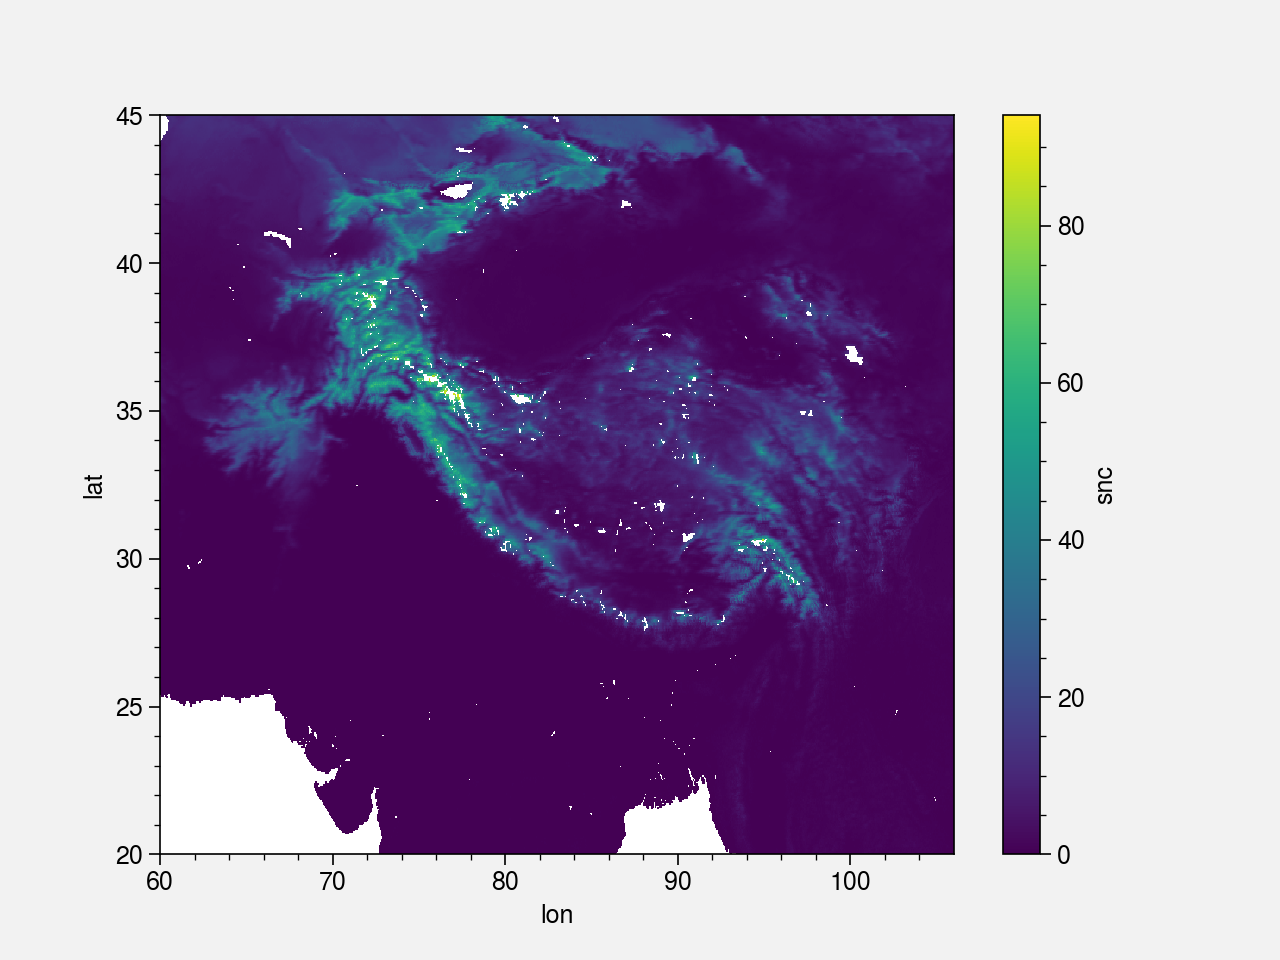

In [14]:
obs_clim.plot()

### Regrid using xESMF (https://xesmf.readthedocs.io/en/latest/) 

Regrid towards HR-CM6 with lower resolution

In [17]:
import scipy

def add_matrix_NaNs(regridder):
        X = regridder.weights
        M = scipy.sparse.csr_matrix(X)
        num_nonzeros = np.diff(M.indptr)
        M[num_nonzeros == 0, 0] = np.NaN
        regridder.weights = scipy.sparse.coo_matrix(M)
        return regridder

regridder_obs = xe.Regridder(obs_clim, model_CM6_clim, 'bilinear', periodic=False, reuse_weights=True)
regridder_obs = add_matrix_NaNs(regridder_obs)
obs_clim_regrid = regridder_obs(obs_clim)

# reuse_weights=False car déjà fichier qui a le même nom
regridder_CM7 = xe.Regridder(model_CM7_clim, model_CM6_clim, 'bilinear', periodic=False, reuse_weights=False)
model_CM7_clim_regrid = regridder_CM7(model_CM7_clim)

Reuse existing file: bilinear_500x920_71x85.nc
Overwrite existing file: bilinear_70x121_71x85.nc 
 You can set reuse_weights=True to save computing time.


/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


# Plot differences

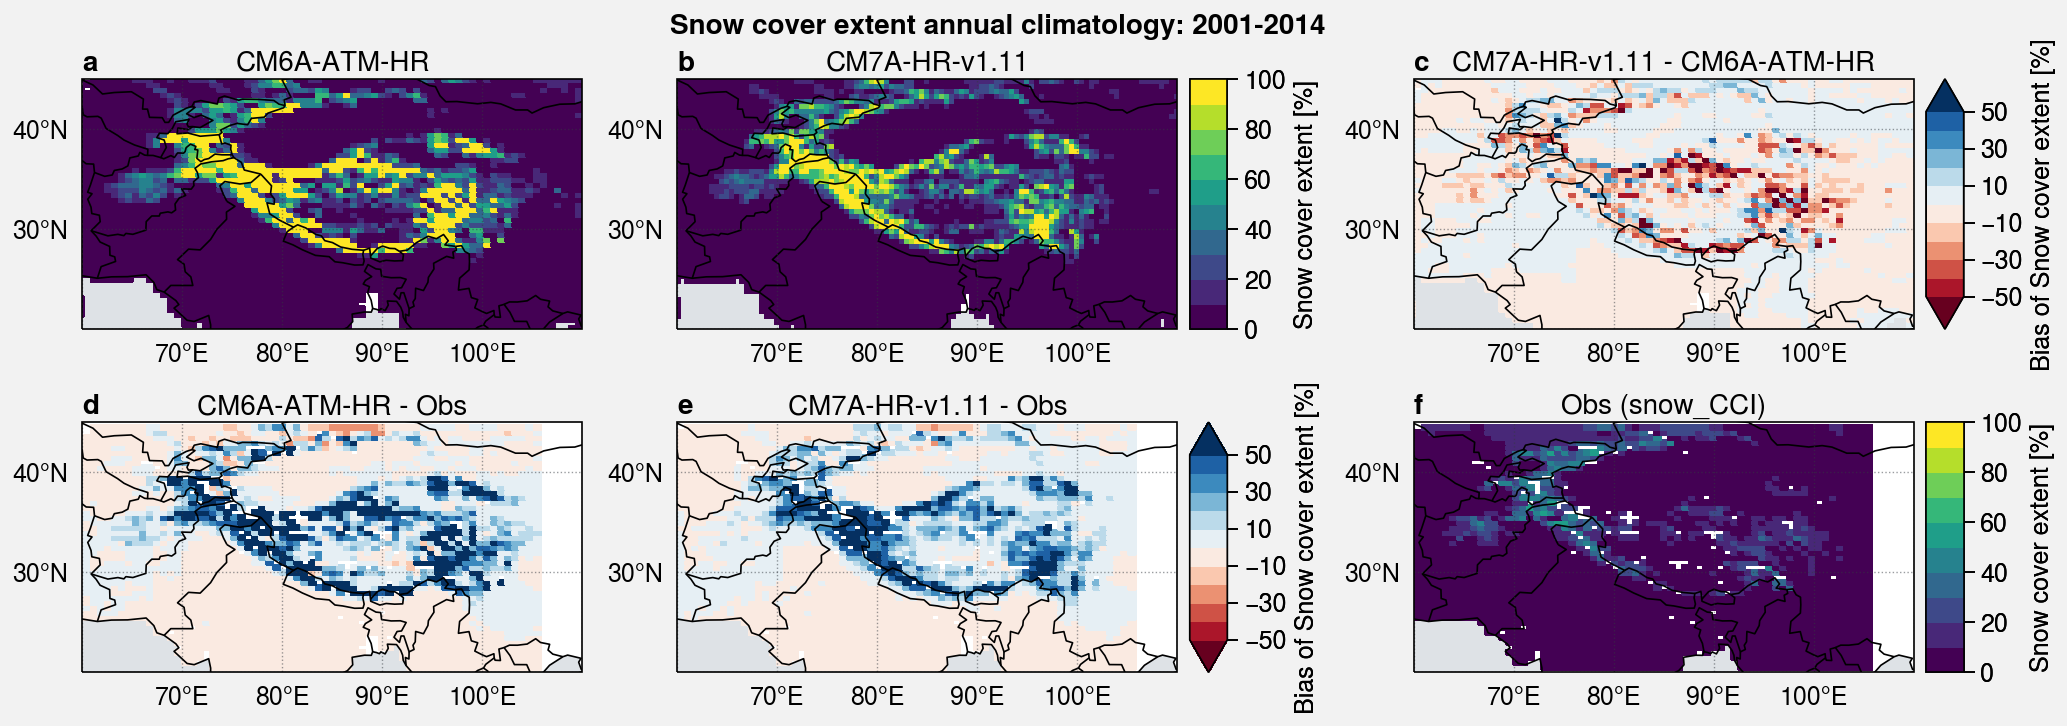

In [20]:
f, axs = plot.subplots(proj='cyl', ncols=3, nrows=2, axwidth=2.5)

levels_diff = plot.arange(-50,50,10)
cmap_diff = 'BuRd_r'
extend_diff = 'both'

# First row: differences CM7A-HR-v1.11 / not guide
axs[0].pcolormesh(model_CM6_clim, cmap=cmap, levels=levels)
axs[0].format(title='CM6A-ATM-HR')

m1 = axs[1].pcolormesh(model_CM7_clim, cmap=cmap, levels=levels)
axs[1].format(title='CM7A-HR-v1.11')
axs[1].colorbar(m1, label=label+ ' ['+units+']')

m2 = axs[2].pcolormesh(model_CM7_clim_regrid - model_CM6_clim, cmap=cmap_diff, levels=levels_diff, extend=extend_diff)
axs[2].format(title='CM7A-HR-v1.11 - CM6A-ATM-HR')
axs[2].colorbar(m2, label='Bias of '+label+ ' ['+units+']')


# Second row: differences with obs

axs[3].pcolormesh(model_CM6_clim - obs_clim_regrid, cmap=cmap_diff, levels=levels_diff, extend=extend_diff)
axs[3].format(title='CM6A-ATM-HR - Obs')

axs[4].pcolormesh(model_CM7_clim_regrid - obs_clim_regrid, cmap=cmap_diff, levels=levels_diff, extend=extend_diff)
axs[4].format(title='CM7A-HR-v1.11 - Obs')
axs[4].colorbar(m2, label='Bias of '+label+ ' ['+units+']')

axs[5].pcolormesh(obs_clim_regrid, cmap=cmap, levels=levels)
axs[5].format(title='Obs ('+obs_name+')')
axs[5].colorbar(m1, label=label+ ' ['+units+']')


axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    coast=True, ocean=True, oceancolor='gray3', borders=True,
    suptitle=label+" annual climatology: "+period.start+"-"+period.stop,
    lonlines=10, latlines=10, abc=True, latlim=(latlim.start, latlim.stop), lonlim=(lonlim.start, lonlim.stop)
)

f.save('img/'+var+'_dynamico_snow-CCI_'+period.start+'-'+period.stop+'.jpg')

## Check correlation with topo

In [21]:
ds = xr.open_dataset('/data/mlalande/GMTED2010/GMTED2010_15n120_0500deg.nc').drop_dims('nbounds').swap_dims(
    {'nlat': 'latitude', 'nlon': 'longitude'}).drop({'nlat', 'nlon'}).rename(
    {'latitude': 'lat', 'longitude': 'lon'}).sel(lat=latlim_ext, lon=lonlim_ext)
elevation = ds.elevation
elevation_std = ds.elevation_stddev

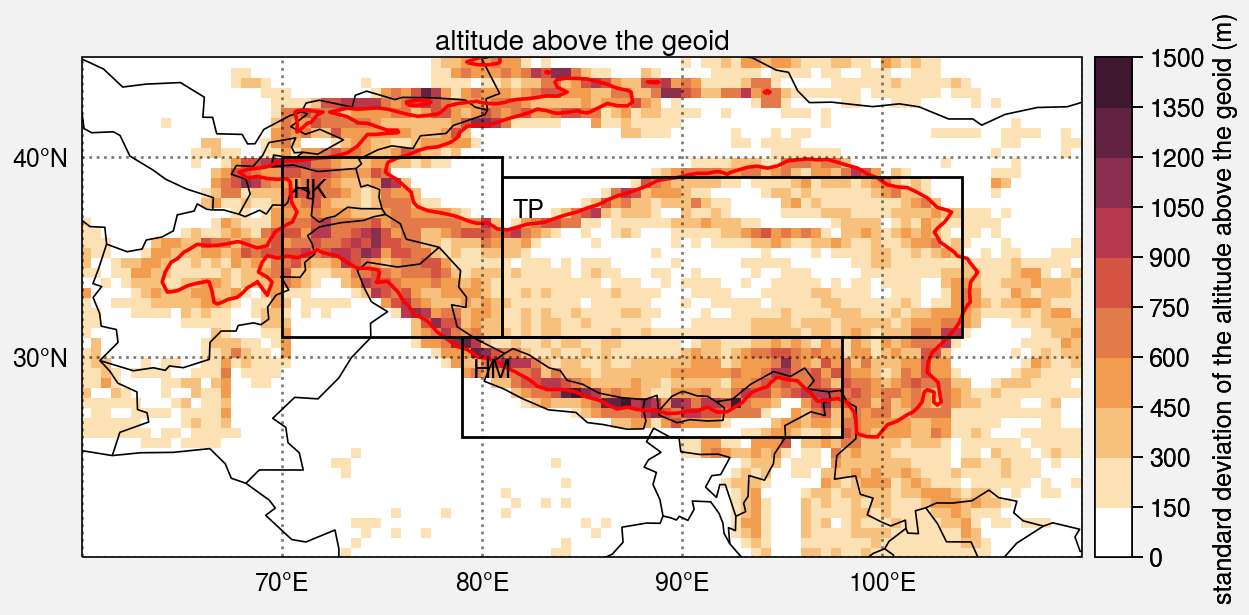

In [22]:
fig, axs = plot.subplots(proj='cyl', axwidth=5)

axs[0].pcolormesh(elevation_std, colorbar='r')

u.plot_zones(axs[0])
axs[0].contour(elevation, levels=[2500], color='red')

axs.format(
    labels=True, coast=True, ocean=True, oceancolor='gray3', borders=True,
    lonlines=10, latlines=10, latlim=(latlim.start, latlim.stop), lonlim=(lonlim.start, lonlim.stop)
)

# fig.save('img/std.jpg')

In [23]:
elevation_std_regrid = u.regrid(elevation_std, model_CM6_clim, globe=False, periodic=False)
elevation_regrid = u.regrid(elevation, model_CM6_clim, globe=False, periodic=False)

Reuse existing file: bilinear_70x120_71x85.nc
Reuse existing file: bilinear_70x120_71x85.nc


/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


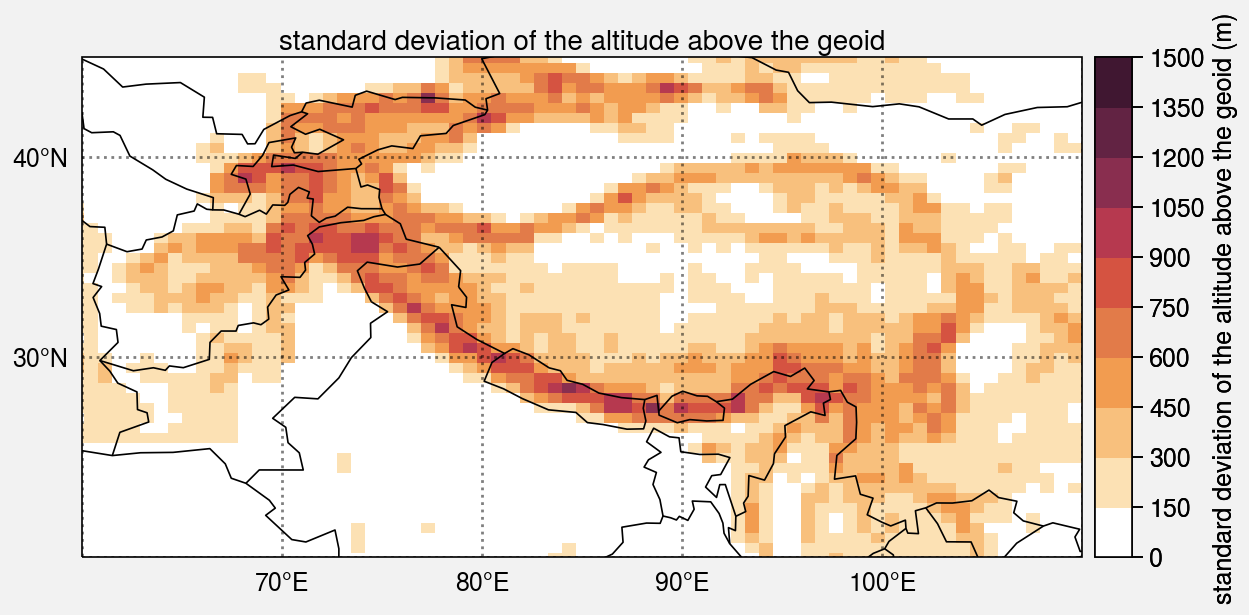

In [24]:
fig, axs = plot.subplots(proj='cyl', axwidth=5)

axs[0].pcolormesh(elevation_std_regrid, colorbar='r', levels=plot.arange(0,1500,150))

axs.format(
    labels=True, coast=True, ocean=True, oceancolor='gray3', borders=True,
    lonlines=10, latlines=10, latlim=(latlim.start, latlim.stop), lonlim=(lonlim.start, lonlim.stop)
)

In [25]:
std = elevation_std_regrid.sel(lon=lonlim, lat=latlim).values.flatten()
topo = elevation_regrid.sel(lon=lonlim, lat=latlim).values.flatten()
ref_snc = (model_CM6_clim - obs_clim_regrid).sel(lon=lonlim, lat=latlim).values.flatten()
new_snc = (model_CM7_clim_regrid - obs_clim_regrid).sel(lon=lonlim, lat=latlim).values.flatten()

std = np.array(std)
topo = np.array(topo)
ref_snc = np.array(ref_snc)
new_snc = np.array(new_snc)

# Remove NaNs (because of ocean)
std = std[~np.isnan(ref_snc)]
topo = topo[~np.isnan(ref_snc)]
new_snc = new_snc[~np.isnan(ref_snc)]
ref_snc = ref_snc[~np.isnan(ref_snc)]

print(len(std))
print(len(topo))
print(len(new_snc))
print(len(ref_snc))

2924
2924
2924
2924


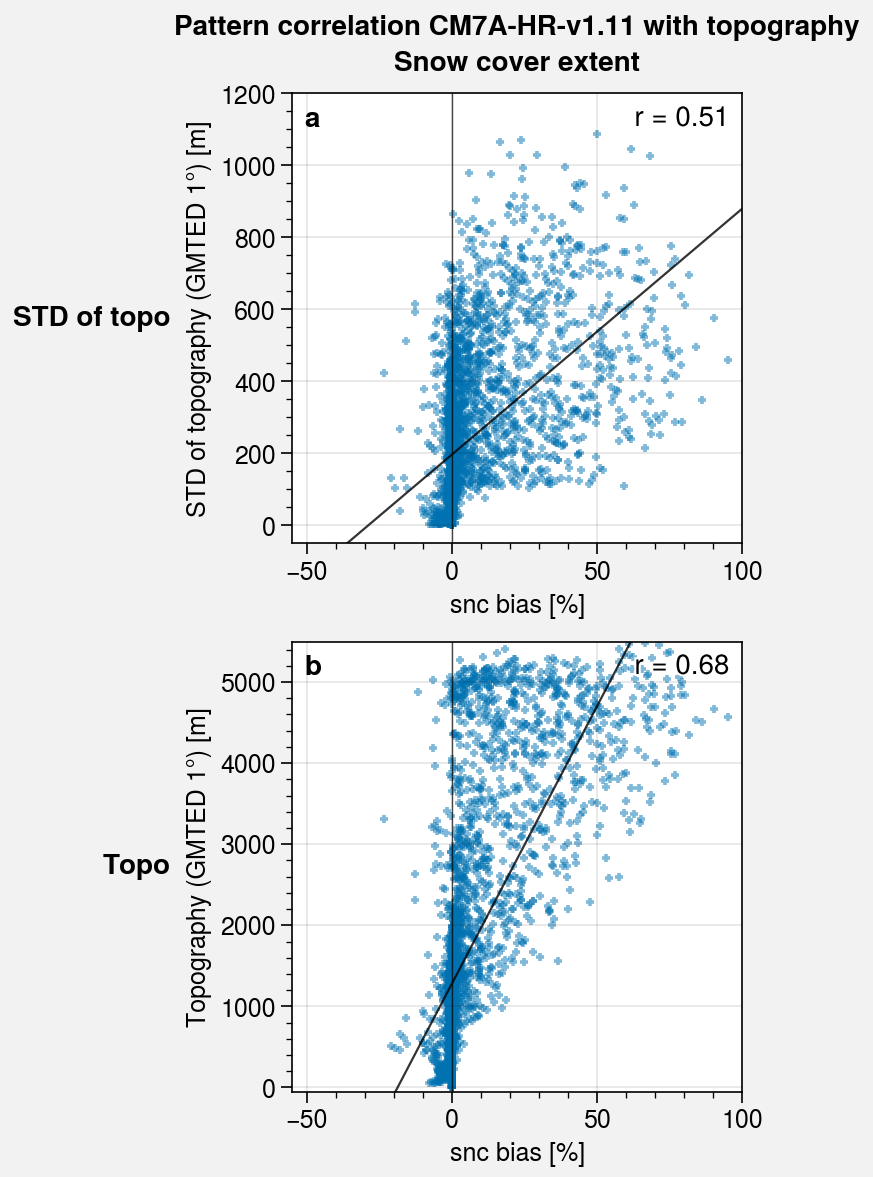

In [28]:
xlim_snc = (-55,100)
xlim_tas = (-16,5)
xlim_pr = (-6,14)
ylim_std = (-50,1200)
ylim_topo = (-50,5500)

x_list = [new_snc]*2
x_lim_list = [xlim_snc]*2
x_label_list = ['snc bias [%]']*2

y_list = [std for _ in range(len(x_list)//2)] + [topo for _ in range(len(x_list)//2)]
y_lim_list = [ylim_std for _ in range(len(x_list)//2)] + [ylim_topo for _ in range(len(x_list)//2)]
y_label_list = ['STD of topography' for _ in range(len(x_list)//2)] + ['Topography' for _ in range(len(x_list)//2)]



fig, axs = plot.subplots(ncols=1, nrows=2, share=0)

for i, ax in enumerate(axs):
    # Scatter plot
    ax.scatter(x_list[i], y_list[i], marker='+', alpha=0.5)

    # Regression
    reg = stats.linregress(x_list[i], y_list[i])
    x = np.array(x_lim_list[i])
    y = reg.slope*x + reg.intercept
    ax.plot(x, y, 'k-', linewidth=0.8, alpha=0.8)
    
    # Add vertical line 
    ax.plot([0, 0], y_lim_list[i], color='k', linestyle='-', alpha=0.7, linewidth=0.5)

    # Format
    ax.format(
        urtitle='r = '+'{:.2f}'.format(reg.rvalue),
        xlabel=x_label_list[i], ylabel=y_label_list[i]+' (GMTED 1°) [m]', 
        ylim=y_lim_list[i], xlim=x_lim_list[i]
    )
    

##############
### Format ###
##############

axs.format(
    suptitle='Pattern correlation CM7A-HR-v1.11 with topography',
    collabels=['Snow cover extent'],
    rowlabels=['STD of topo', 'Topo'],
    abc=True, abcloc='ul'
)

fig.save('img/corr_topo_snow-CCI.jpg')